In [14]:
import datajoint as dj
import seaborn as sns
from datetime import datetime, timedelta
sns.set_context("talk")
import matplotlib.pyplot as plt 

dj.blob.use_32bit_dims = True  # necessary for pd.blob read
import pandas as pd
import behav_viz.ingest as ingest
import behav_viz.visualize as viz
FIGURES_PATH = ingest.dir_utils.get_figures_path("rats", "beta_fixationgrower")

# settings
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
beta_1 = [
    "R033",
    "R039",
    "R010",
    "R012",
]
date_min = "2024-07-09"
today = datetime.today().date()
date_max = today.strftime("%Y-%m-%d")

trials_df = ingest.create_trials_df.create_trials_df_from_dj(
    animal_ids=beta_1, date_min=date_min
)
days_df = ingest.create_days_df.create_days_df_from_dj(
    animal_ids=beta_1, date_min=date_min, date_max=date_max, verbose=True
)

beta_2 = [
    "R034",
    "R036",
]

date_min = "2024-07-22"

trials_df2 = ingest.create_trials_df.create_trials_df_from_dj(
    animal_ids=beta_2, date_min=date_min
)
days_df2 = ingest.create_days_df.create_days_df_from_dj(
    animal_ids=beta_2, date_min=date_min, date_max=date_max, verbose=True
)

trials_df = pd.concat([trials_df, trials_df2])
days_df = pd.concat([days_df, days_df2])

Fetched 15 dates from Sessions table from 2024-07-09 to 2024-07-25 for R033

Fetched 16 dates from Sessions table from 2024-07-09 to 2024-07-25 for R039

Fetched 16 dates from Sessions table from 2024-07-09 to 2024-07-25 for R010

Fetched 16 dates from Sessions table from 2024-07-09 to 2024-07-25 for R012

Fetched data from SessionAggDate table from 2024-07-09 to 2024-07-25  
	Last date on the database is 2024-07-25 but user is querying data 
	for 2024-07-26. Attempting to manually aggregate today's data.
No new data from today, 2024-07-26 to add to SessionAggDate.

62 daily summaries fetched for animals: 
['R033', 'R039', 'R010', 'R012']
between 2024-07-09 and 2024-07-25
Not all variables are the same length. Cannot create proper DataFrame
result: 42
hits: 42
violations: 42
temperror: 42
hit_rate: 41
error_rate: 41
violation_rate: 41
temp_error_rate: 41
n_lpokes: 41
n_cpokes: 41
n_rpokes: 41
trial_dur: 41
trial_start: 41
first_spoke: 41
first_lpoke: 41
first_rpoke: 41
n_settling_ins: 

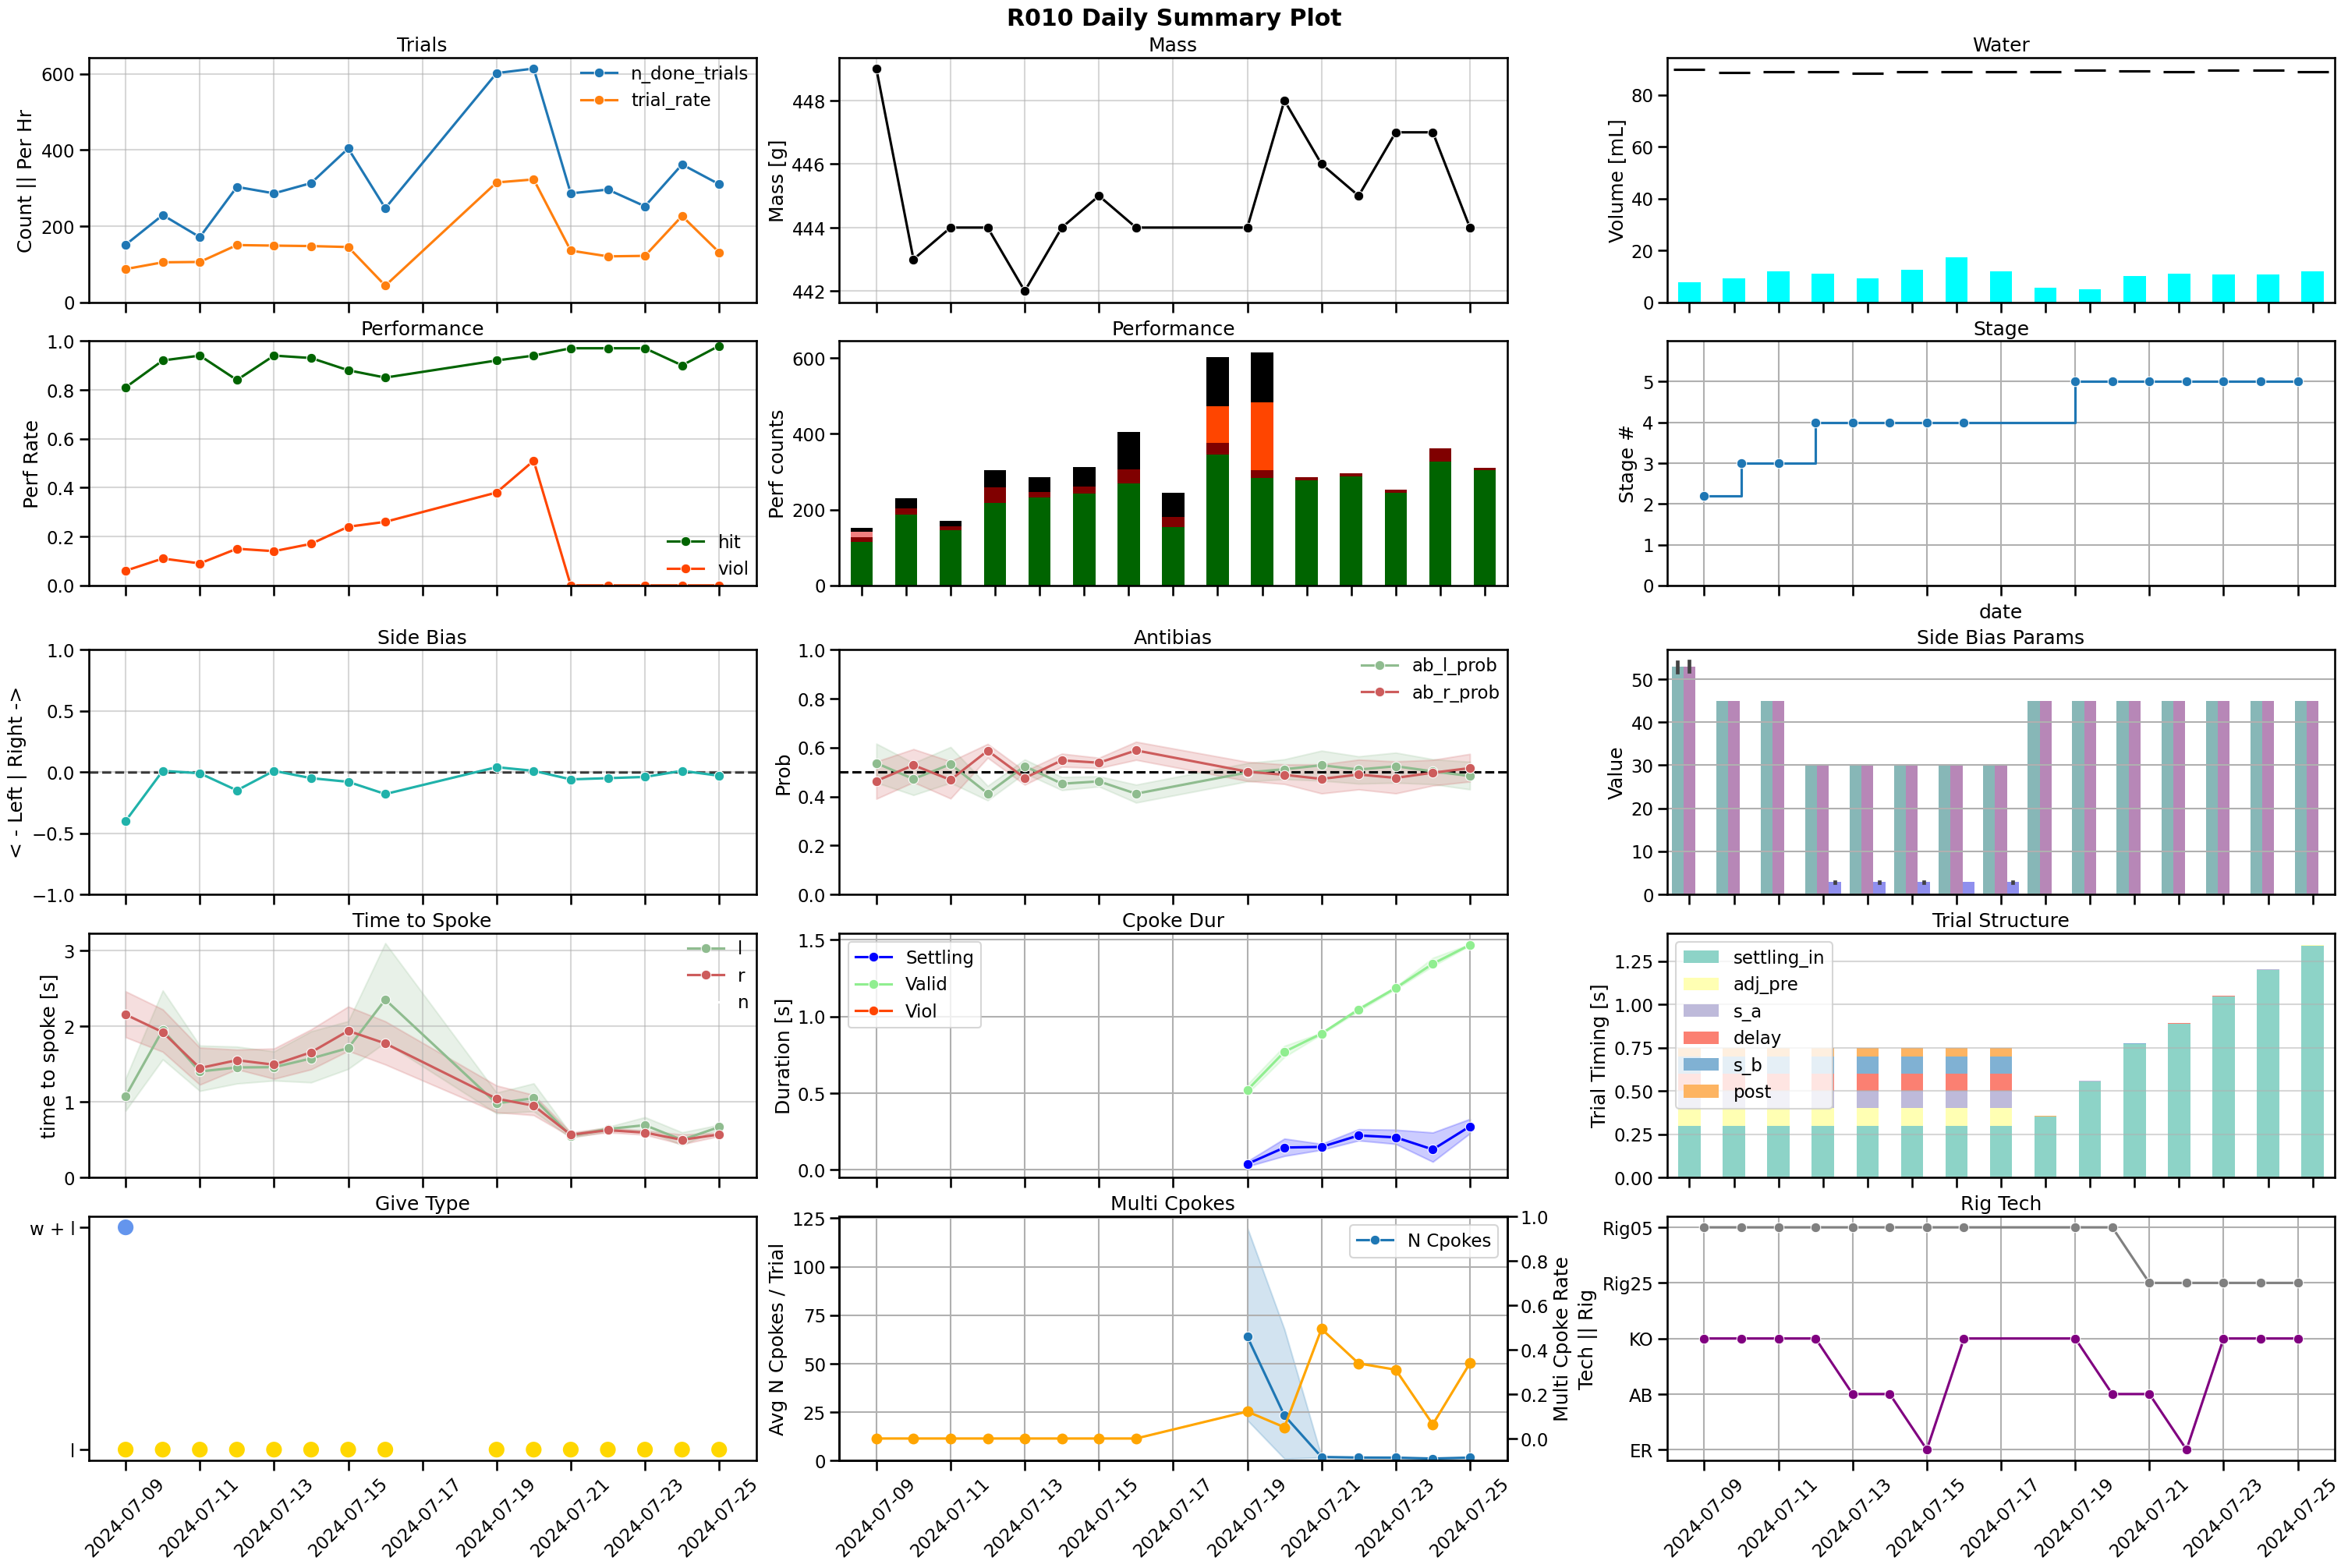

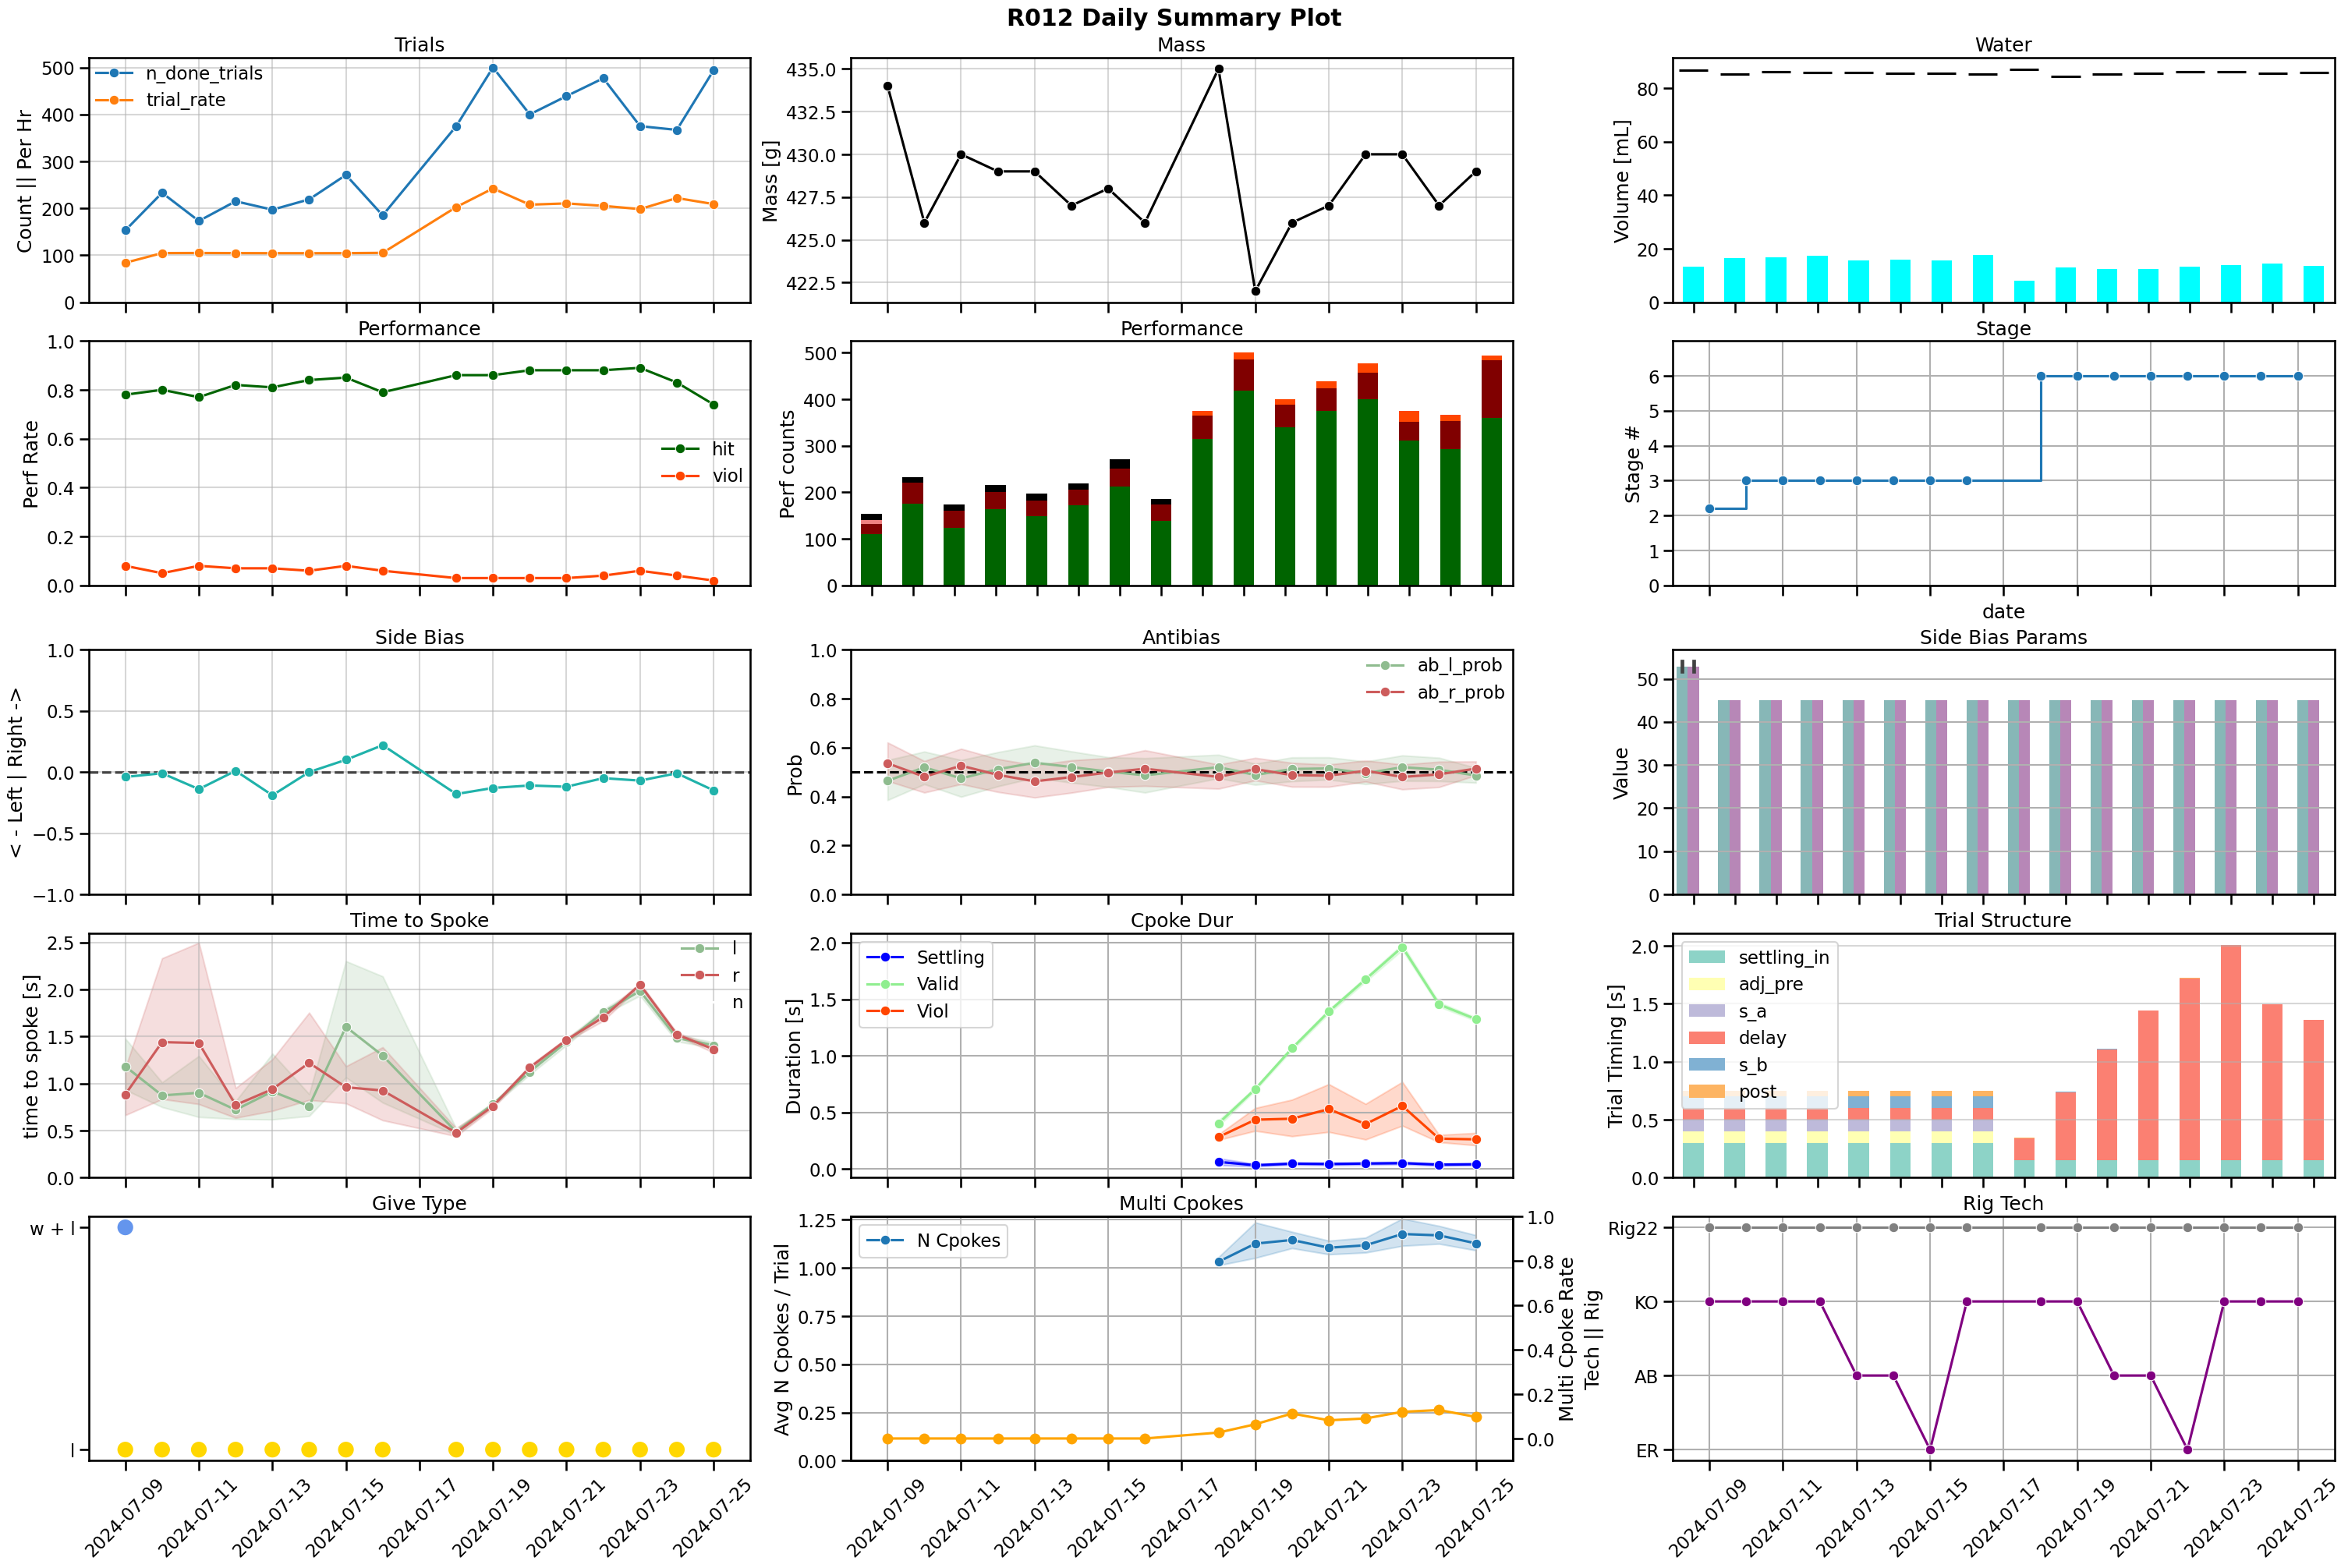

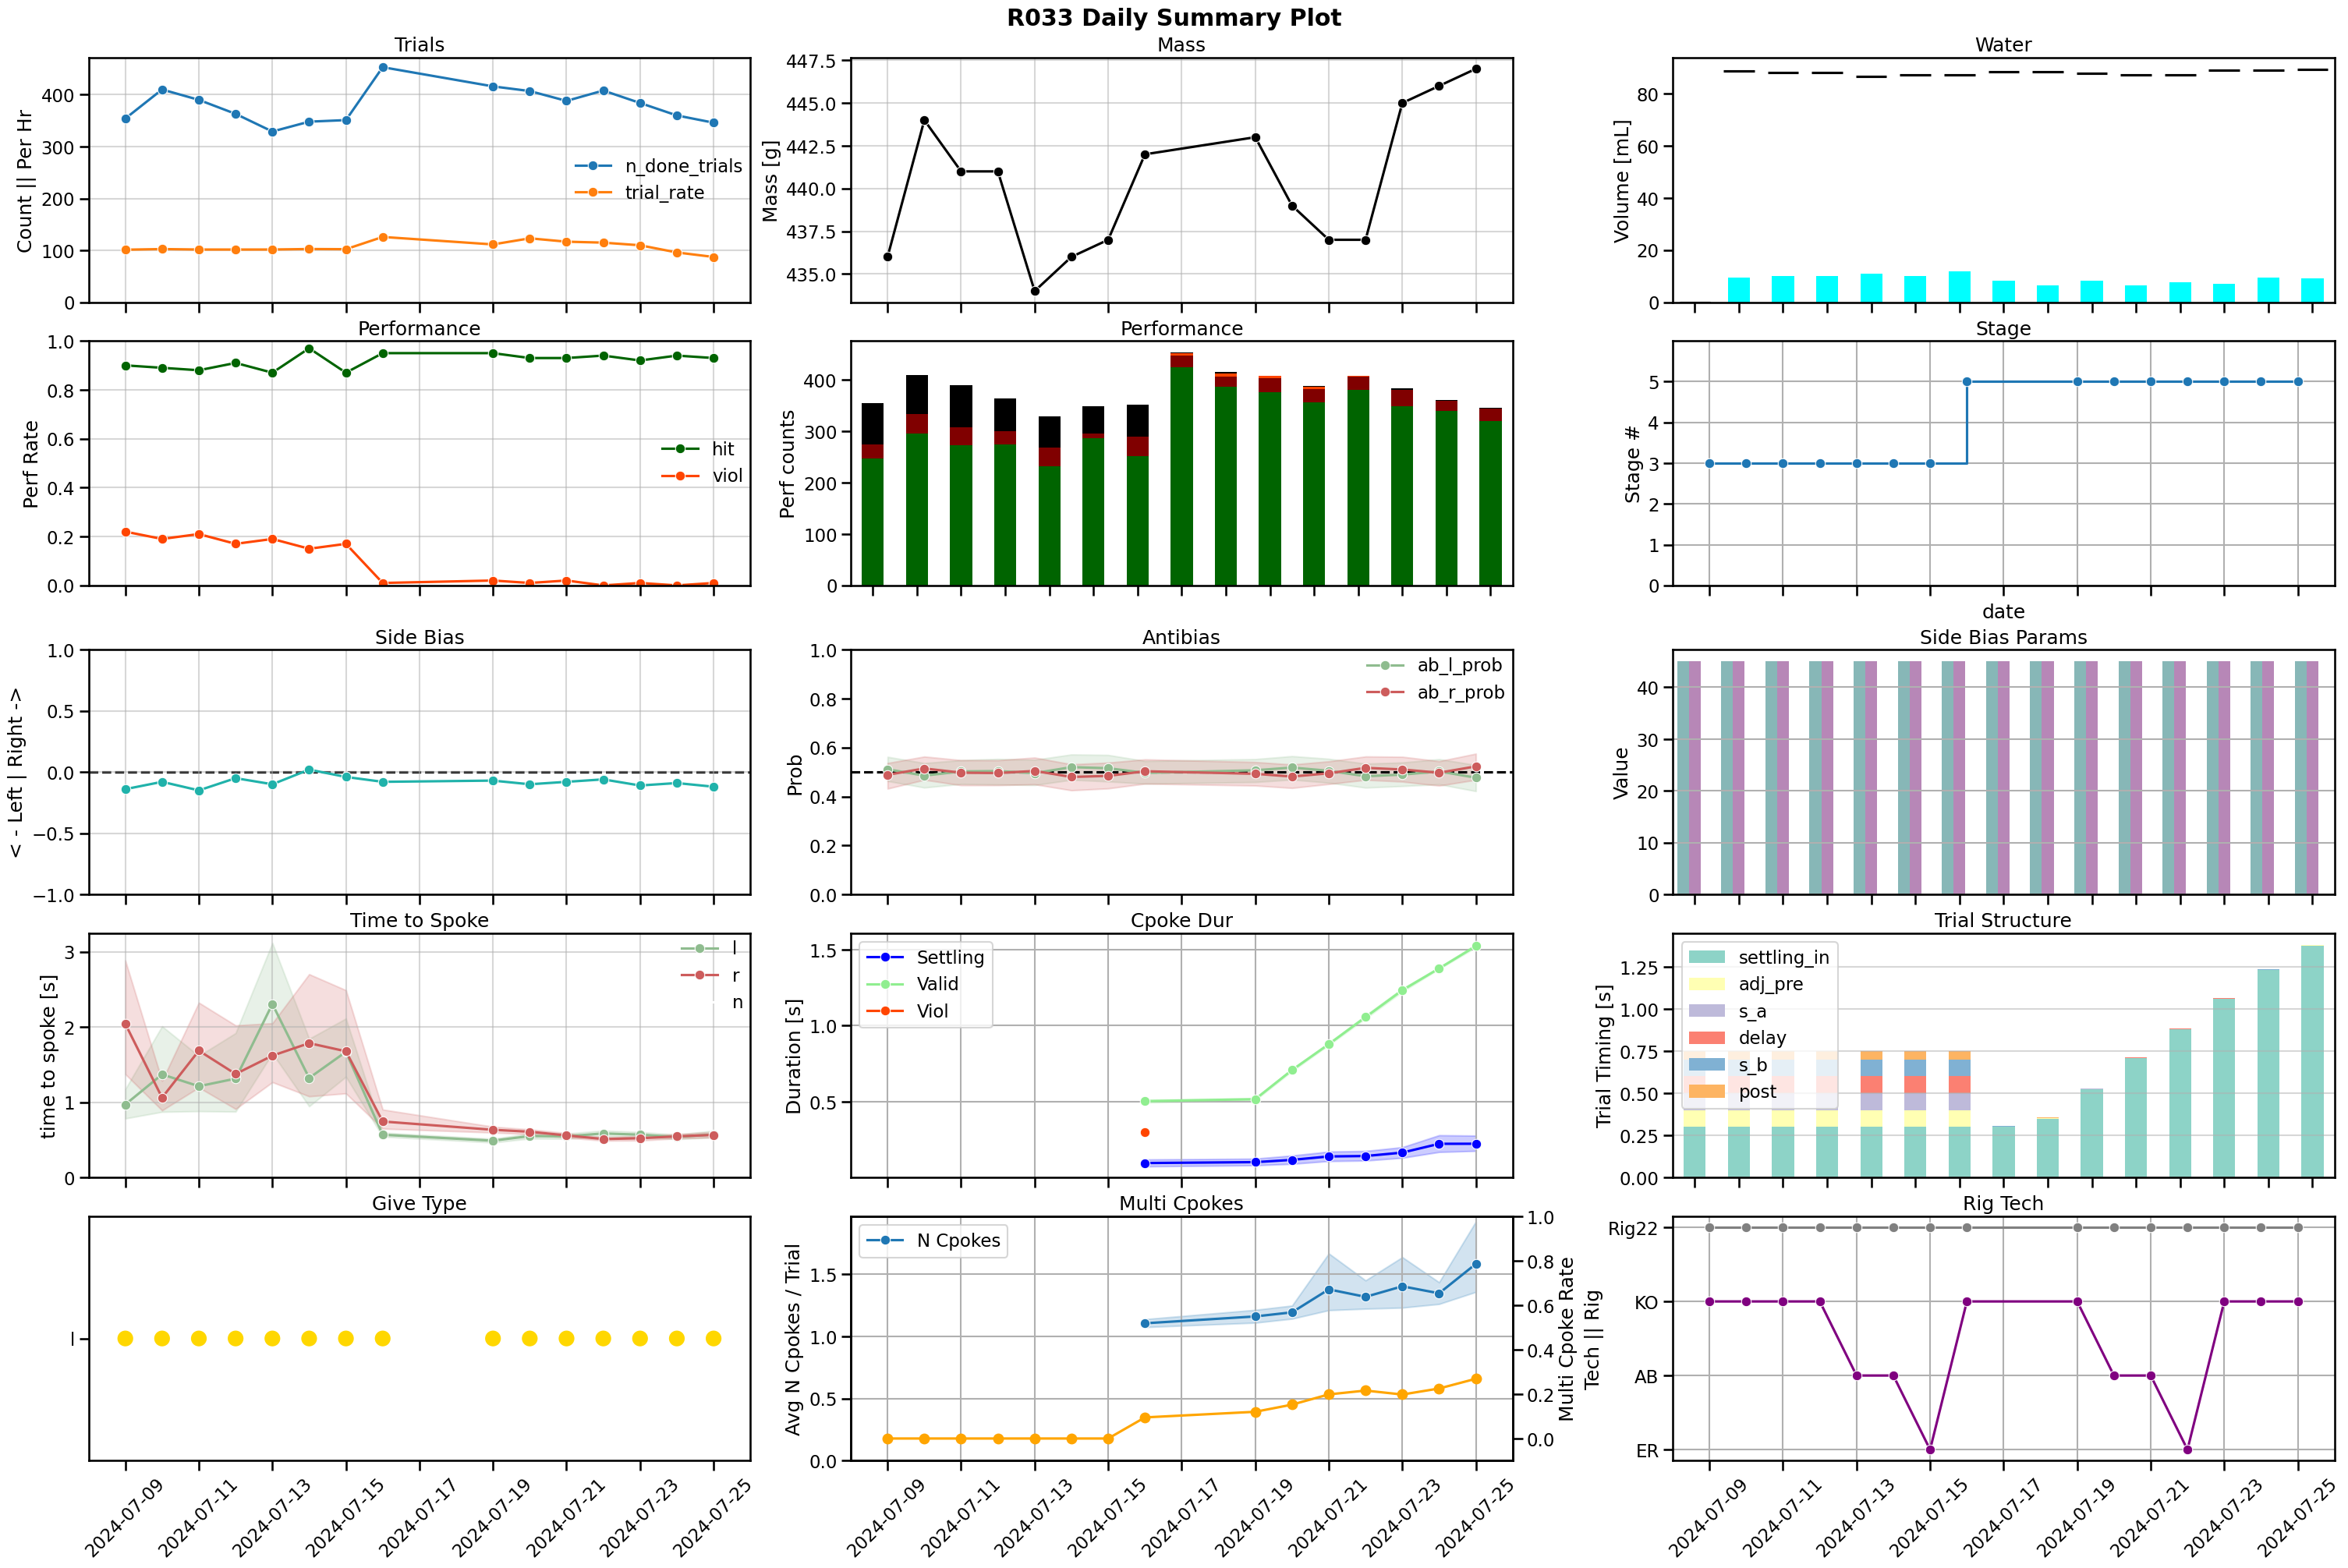

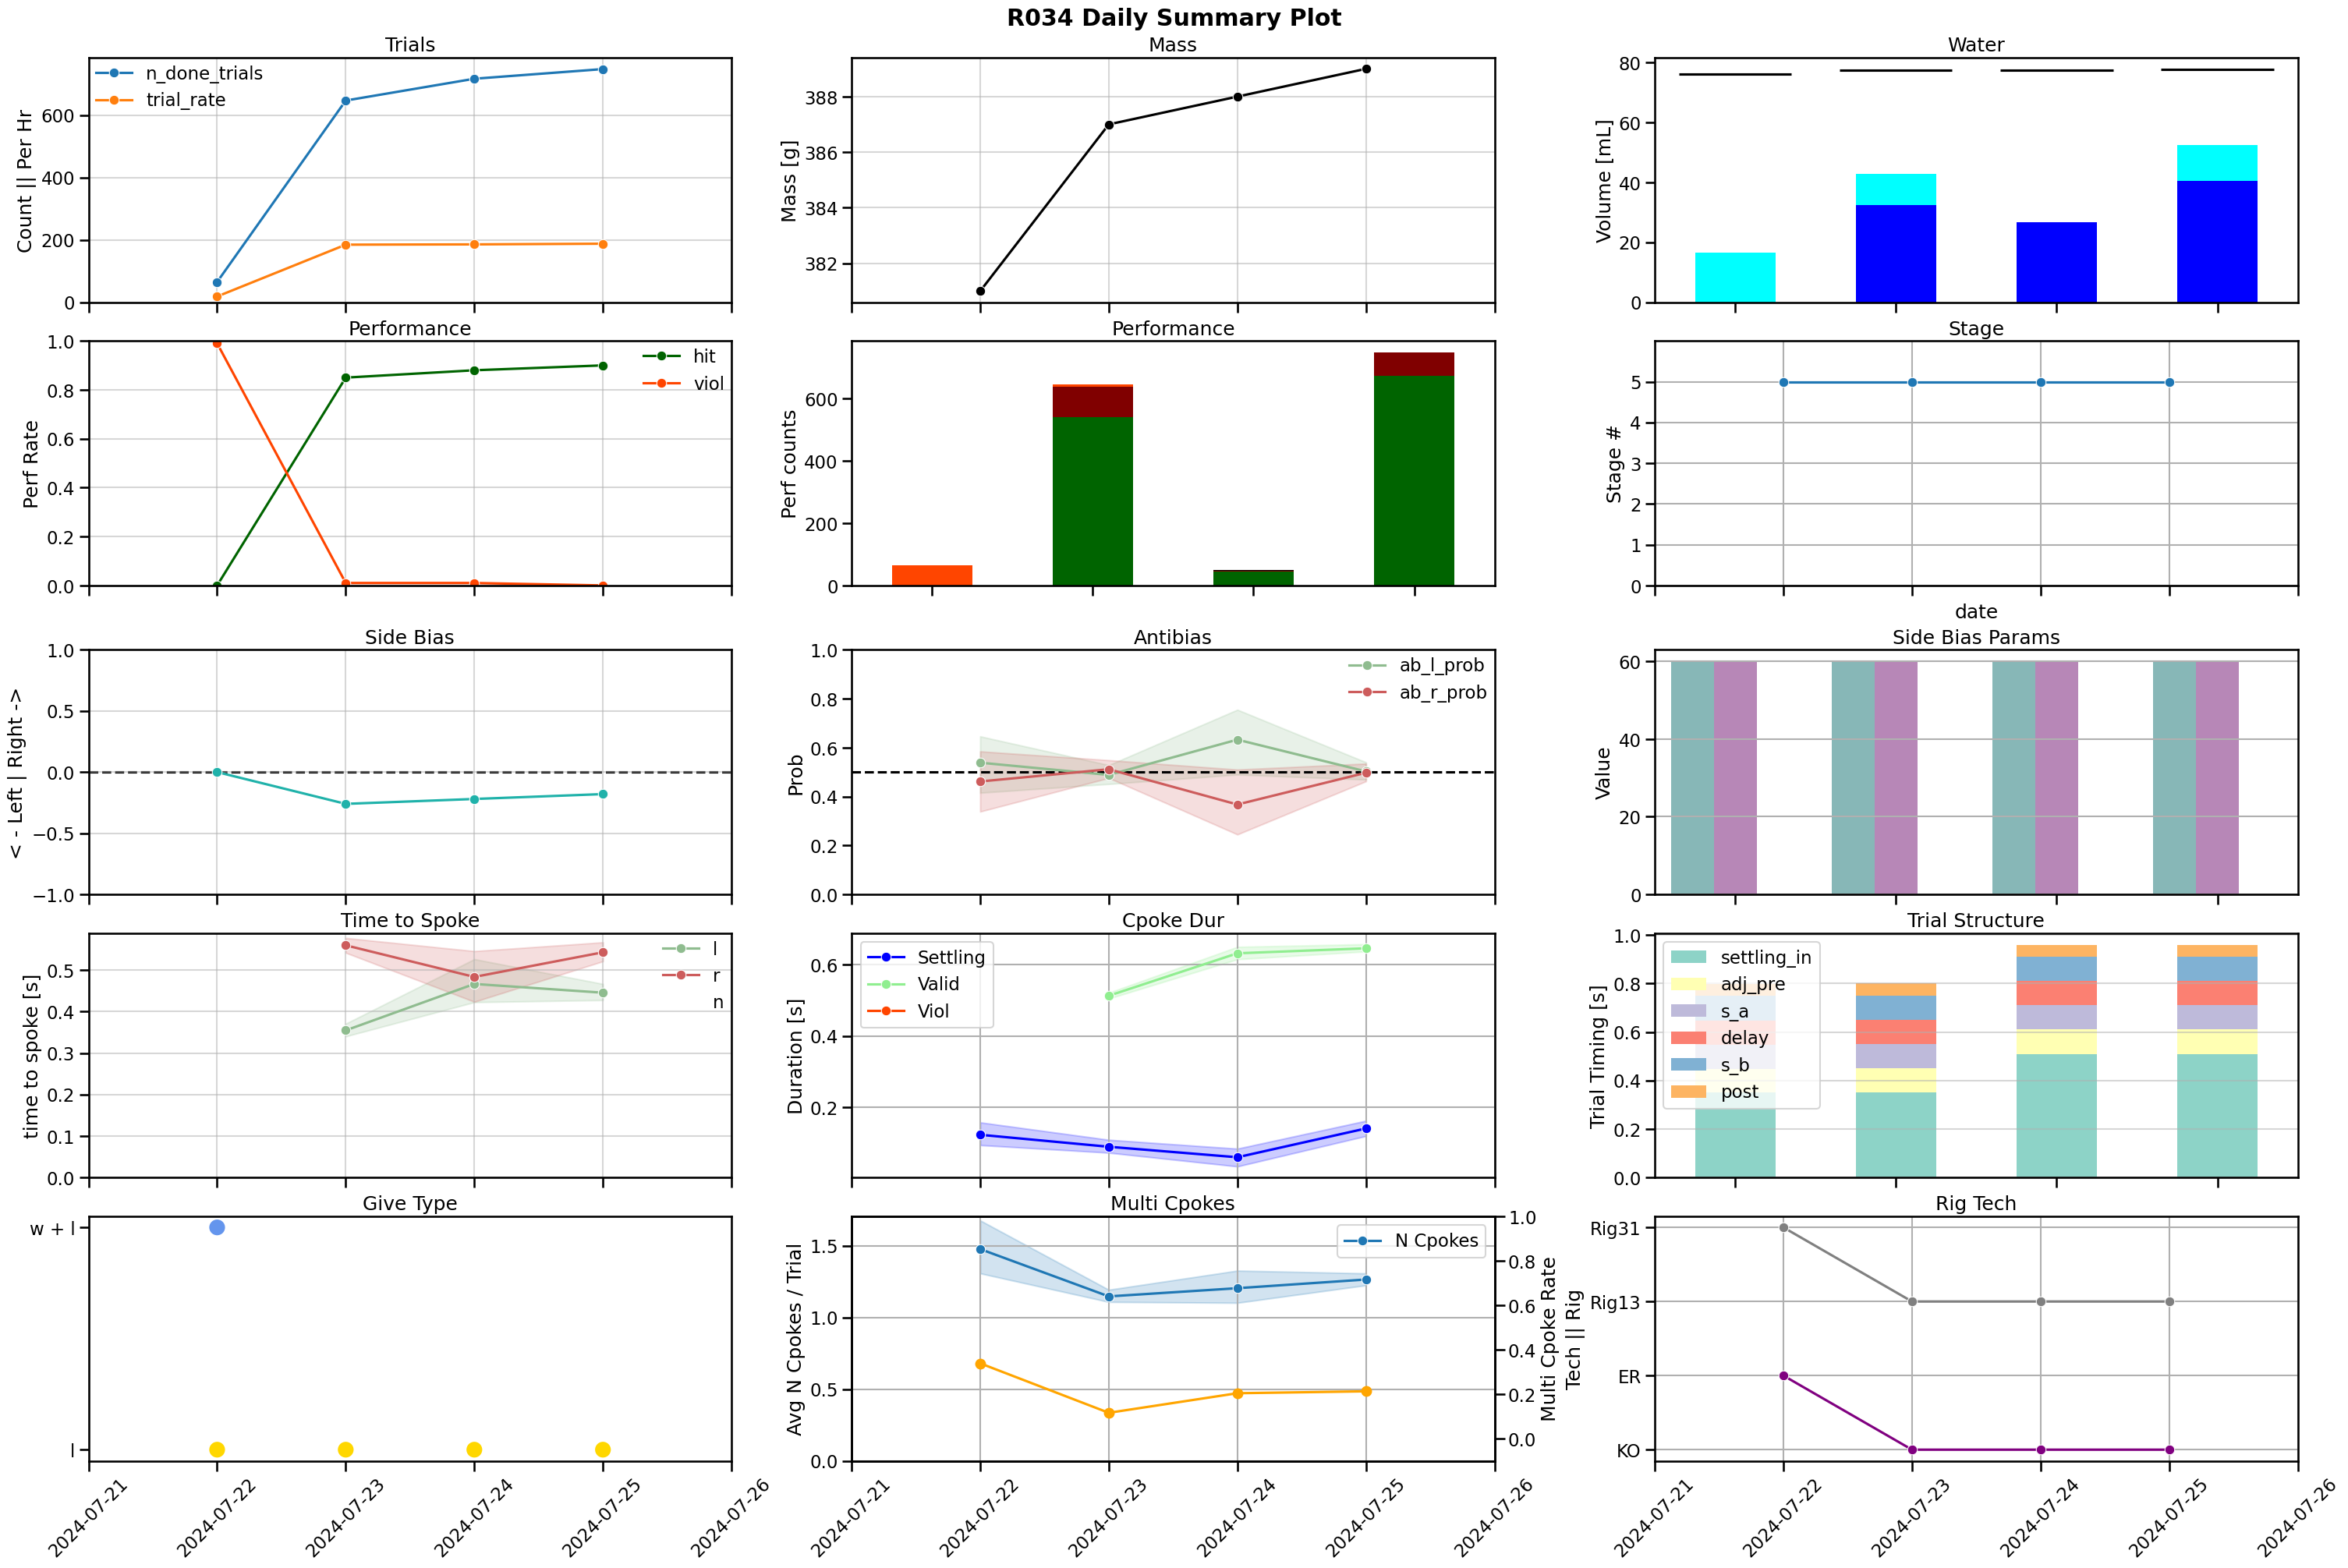

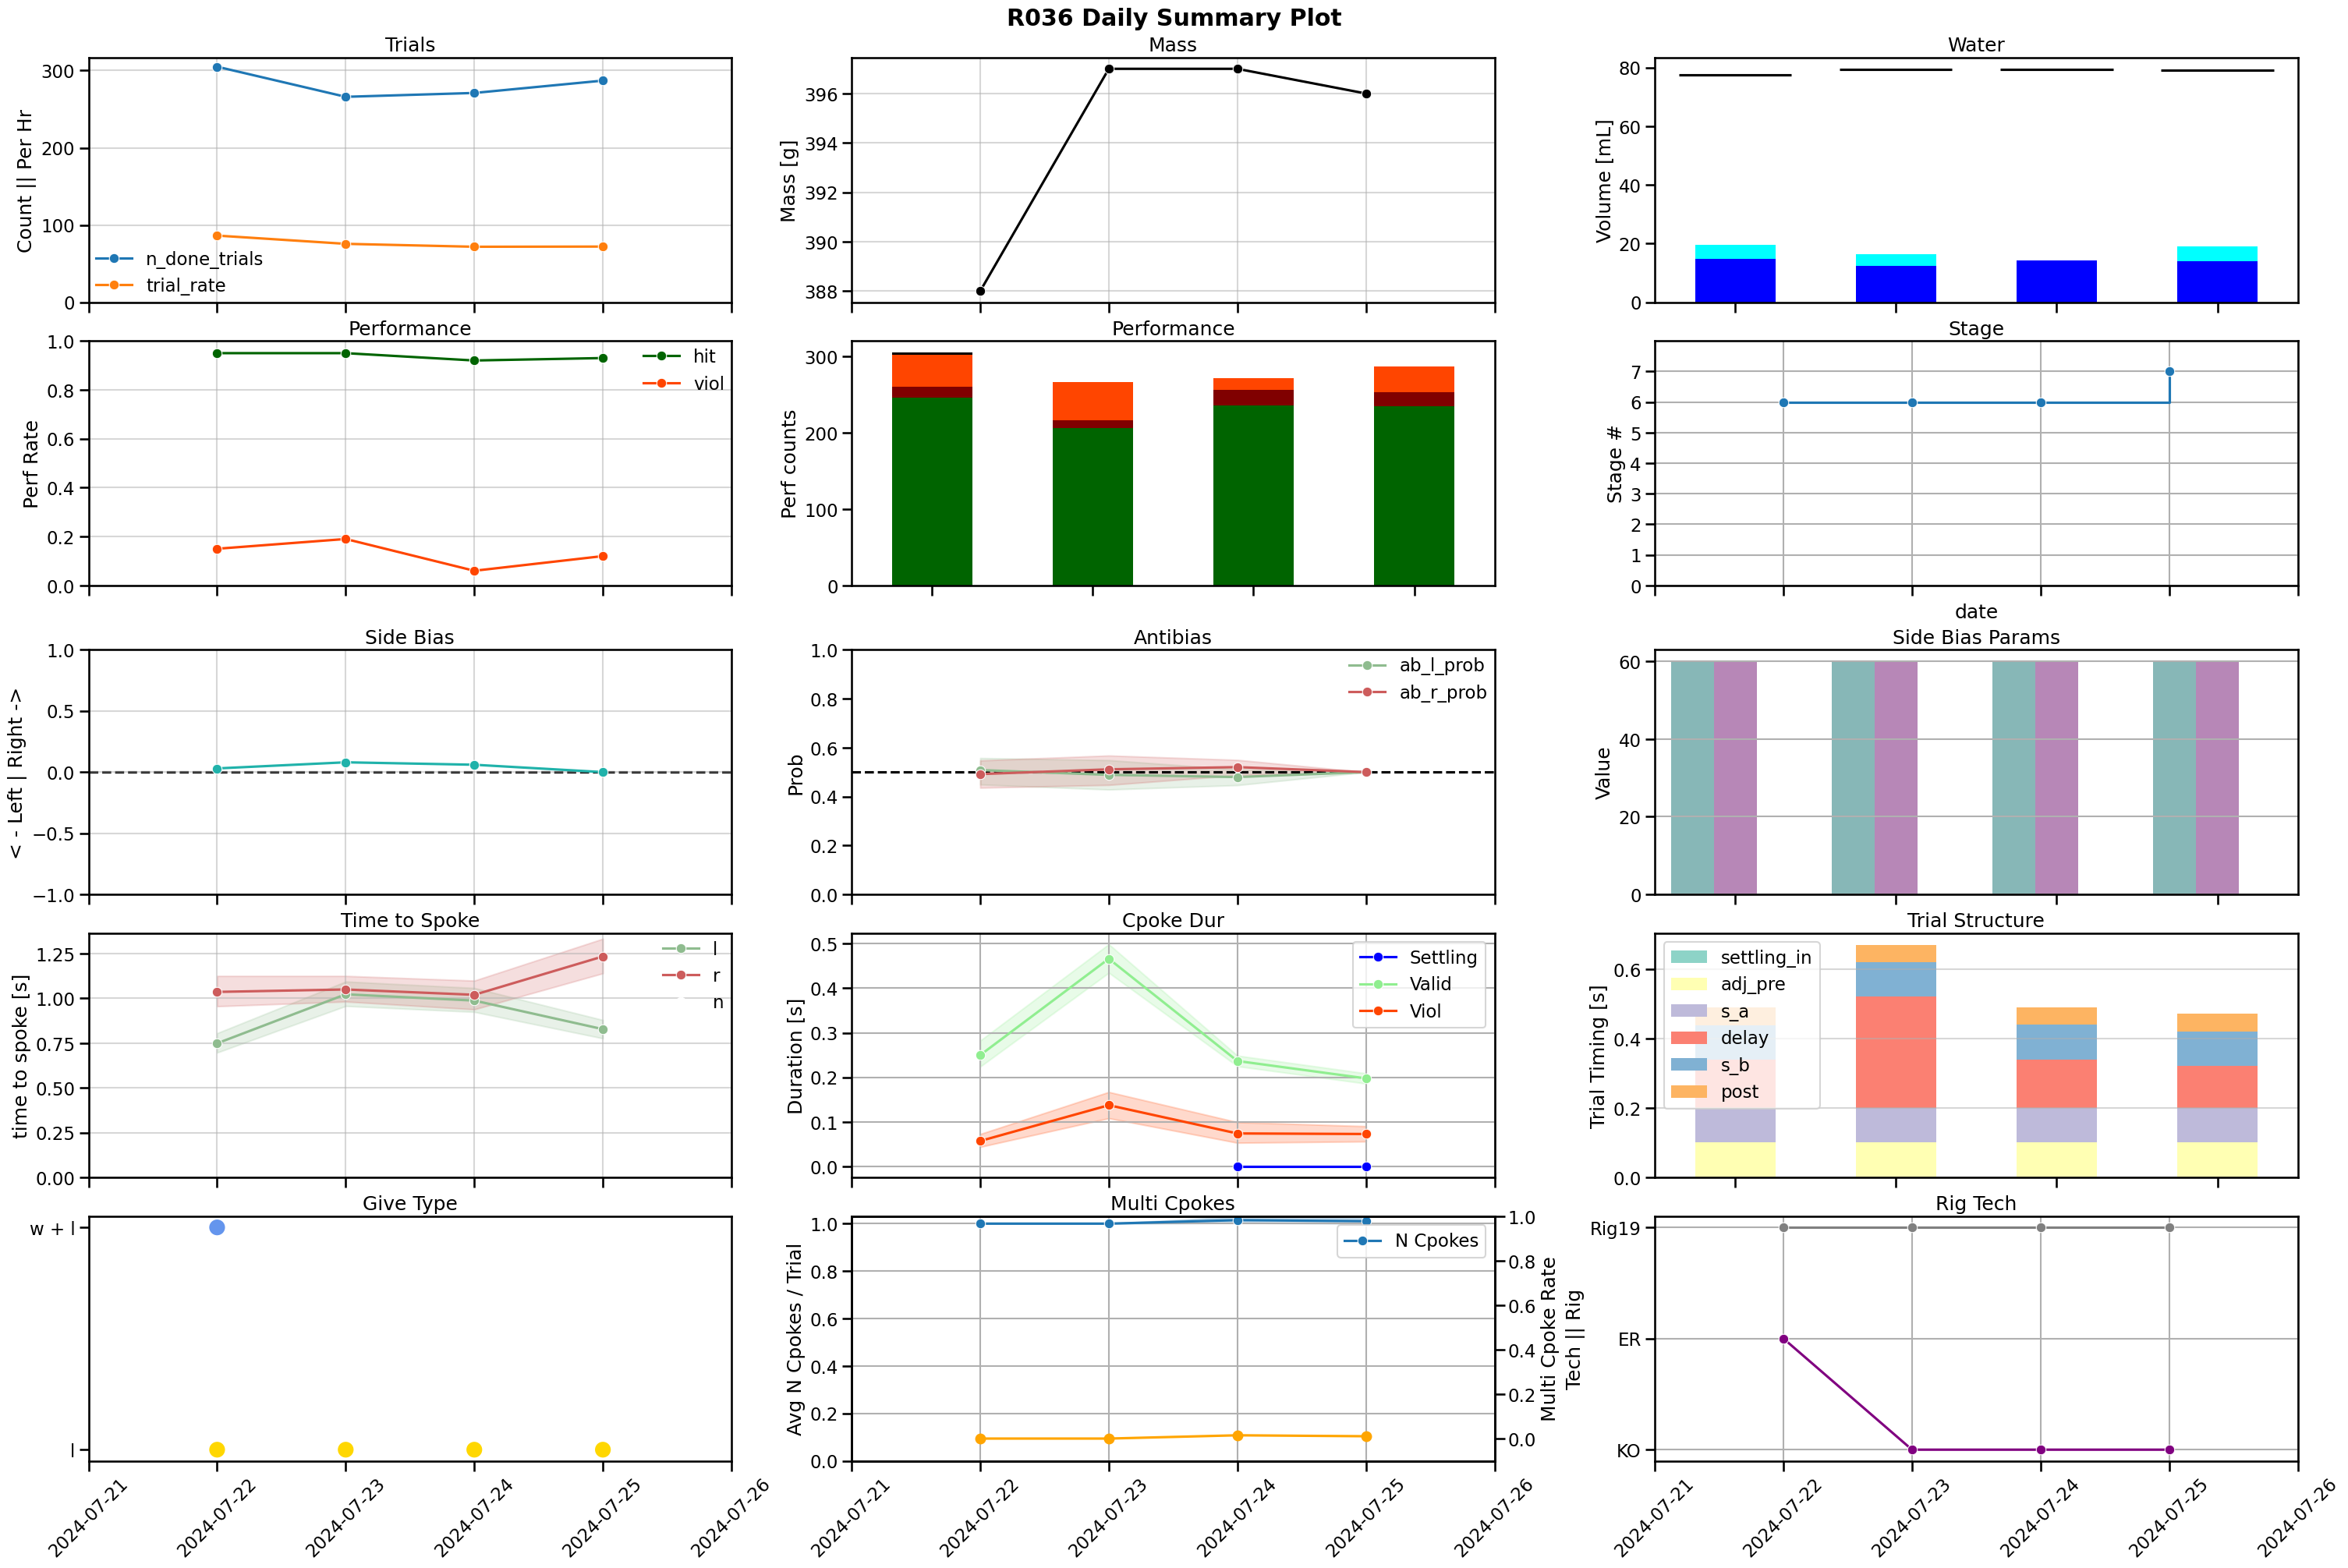

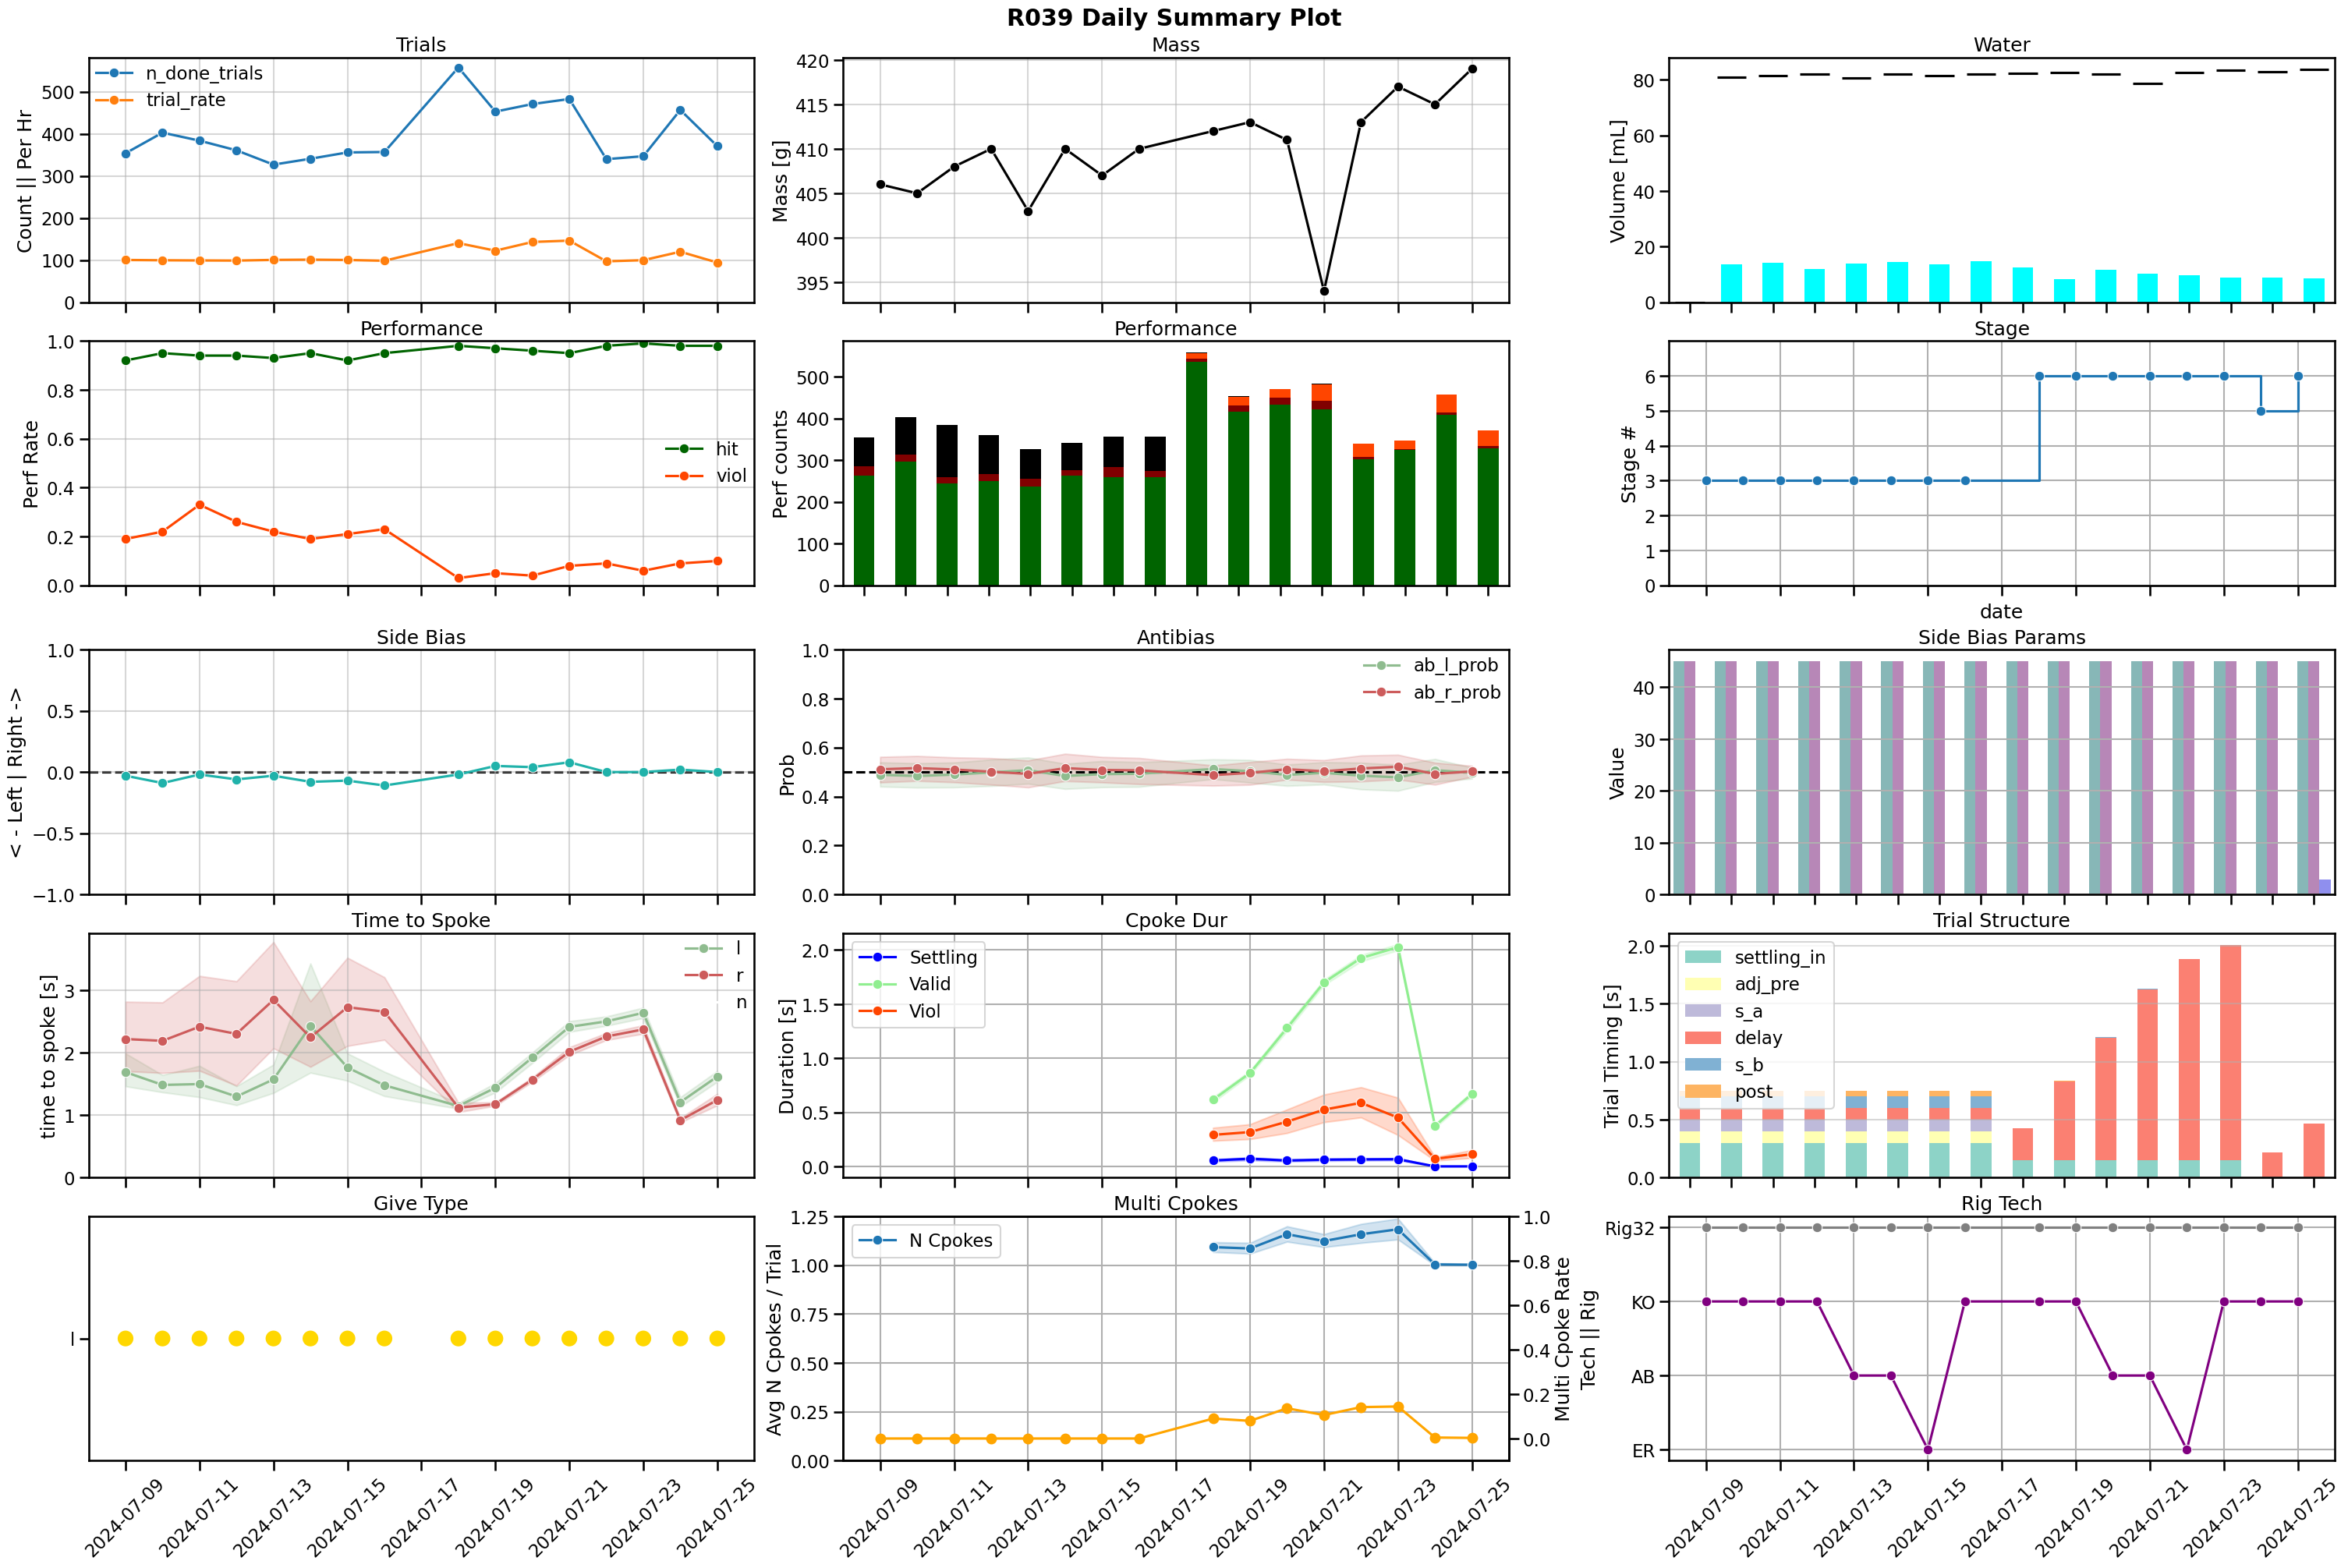

In [7]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    viz.summarize.over_days_summaries(
        animal_id, animal_days_df, animal_trials_df.reset_index()
    )

In [8]:
viz.summarize.single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making R033_2024-07-25_day_summary
making R034_2024-07-25_day_summary
skipping failed cpokes plots due to hist error
making R036_2024-07-25_day_summary
making R039_2024-07-25_day_summary


## Spoke Violations

In [7]:
yesterday = today - timedelta(days=1)
r36 = trials_df.query("animal_id == 'R036'").query("date == @yesterday")

In [17]:
r36.columns

Index(['trial', 'animal_id', 'date', 'sess_id', 'protocol', 'result', 'hits',
       'violations', 'temperror', 'hit_rate', 'error_rate', 'violation_rate',
       'temp_error_rate', 'n_lpokes', 'n_cpokes', 'n_rpokes', 'trial_dur',
       'trial_start', 'first_spoke', 'first_lpoke', 'first_rpoke',
       'n_settling_ins', 'avg_settling_in', 'cpoke_dur',
       'n_incorr_spokes_during_give_del', 'stage', 'stage_name', 'curriculum',
       'fix_experiment', 'sides', 'SMA_set', 'auto_spoke_to_cpoke', 'sa', 'sb',
       'stimuli_on', 'settling_in_dur', 'legal_cbreak_dur', 'pre_dur',
       'adj_pre_dur', 'stimulus_dur', 'delay_dur', 'post_dur', 'sb_extra_dur',
       'pre_go_dur', 'inter_trial_dur', 'fixation_dur', 'initial_fixation_dur',
       'target_fixation_dur', 'fixation_adjustment',
       'has_reached_target_fixation', 'settling_in_determines_fixation',
       'go_type', 'go_dur', 'give_type_set', 'give_type_imp', 'give_frac',
       'give_delay_dur', 'give_xtra_light_delay_dur', '

<Axes: xlabel='trial', ylabel='delay_dur'>

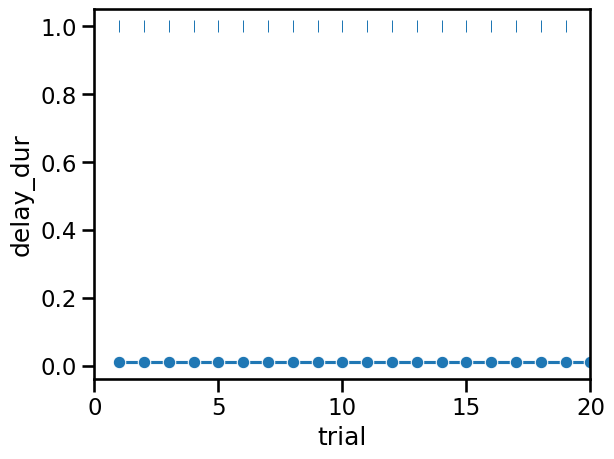

In [20]:
sns.lineplot(r36, x="trial", y="delay_dur", marker="o")
plt.xlim(0, 20)
sns.scatterplot(r36, x="trial", y="delay_warm_up_on", marker="|")

# Dev

In [9]:
for date, df in trials_df.groupby("date"):
    pass

In [10]:
bool(df.settling_in_determines_fixation.iloc[0])

True

In [11]:
viz.plot_trials_info.plot_avg_valid_cpoke_dur?

Signature:
viz.plot_trials_info.plot_avg_valid_cpoke_dur(
    trials_df,
    ax,
    mode='settling_in',
)
Docstring:
plot avg valid cpoke dur for per trial

params
------
trials_df : DataFrame
    trials dataframe with columns `cpoke_dur`
    with trials as row index
ax : matplotlib.axes
    axis to plot to
File:      ~/Desktop/github/jbreda_animal_training/src/behav_viz/visualize/plot_trials_info.py
Type:      function

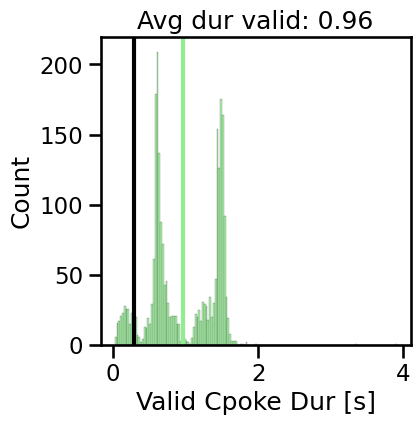

In [12]:
from matplotlib import pyplot as plt

fig, ax = viz.plot_utils.make_fig("s")
viz.plot_trials_info.plot_avg_valid_cpoke_dur(df, ax, mode="violations")

In [13]:
plot_avg_failed_cpoke_dur?

Object `plot_avg_failed_cpoke_dur` not found.


In [14]:
from behav_viz.visualize.FixationGrower.single_day_plots import *

plot_avg_failed_cpoke_dur(df)

ModuleNotFoundError: No module named 'behav_viz.visualize.FixationGrower.single_day_plots'

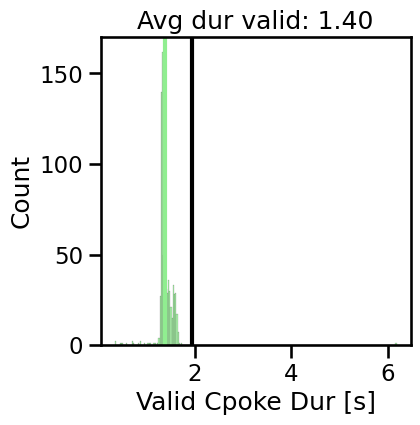

In [ ]:
plot_avg_valid_cpoke_dur(df)